# Building a Logistic Regression Model

In the realm of machine learning, logistic regression is a foundational algorithm frequently utilized for classification tasks. Its simplicity and effectiveness make it an essential tool in a data scientist's toolkit. In this section, we will explore the process of creating a logistic regression model using TensorFlow, a leading library for deep learning and numerical computation. By the end of this guide, you'll have a comprehensive understanding of how to construct, train, and evaluate a logistic regression model, enabling you to tackle binary classification challenges with confidence. Let's embark on this journey to uncover the inner workings of logistic regression within the TensorFlow framework.

<font color='Blue'><b>Example:</b></font> The Wisconsin Breast Cancer dataset, accessible at [https://archive.ics.uci.edu/dataset/10/breast-cancer-wisconsin](https://archive.ics.uci.edu/dataset/10/breast-cancer-wisconsin), is a widely recognized repository of medical data hosted by the UCI Machine Learning Repository. This dataset holds paramount significance in medical research as it offers critical insights into breast cancer diagnosis. The dataset contains a collection of attributes derived from digitized images of fine needle aspirates (FNAs) of breast masses. With a binary classification objective of distinguishing between malignant and benign cases, this dataset has become an integral part of developing predictive models for breast cancer diagnosis. The Wisconsin Breast Cancer dataset plays a pivotal role in advancing both medical diagnostics and machine learning applications in the field of healthcare.

| Attribute             | Description                                                                                                  |
|-----------------------|--------------------------------------------------------------------------------------------------------------|
| Clump Thickness       | Clump thickness is a subjective measure of how thickly the cells are clustered.                            |
| Uniformity of Cell Size | Uniformity of cell size refers to the variability in the size of the cells within the cluster.           |
| Uniformity of Cell Shape | Uniformity of cell shape denotes the variability in the shape of the cells within the cluster.           |
| Marginal Adhesion     | Marginal adhesion assesses the level of cell adhesion to neighboring cells.                                |
| Single Epithelial Cell Size | Single epithelial cell size characterizes the size of individual epithelial cells.                     |
| Bare Nuclei           | Bare nuclei represents the number of nuclei that are not surrounded by cytoplasm.                           |
| Bland Chromatin       | Bland chromatin evaluates the regularity of chromatin distribution in the nuclei.                           |
| Normal Nucleoli       | Normal nucleoli indicates the presence of prominent nucleoli in the nuclei.                                   |
| Mitoses               | Mitoses quantifies the number of mitotic figures present in the cell nuclei.                                   |
| Class                 | The target variable classifies cases into benign (2) and malignant (4) categories.                       |

Our main focus will be to define a custom logistic regression class, harnessing TensorFlow's capabilities to construct, train, and evaluate the model. To put our logistic regression class to the test, we will employ a well-known dataset as an illustrative example. This dataset is the "Wisconsin Breast Cancer dataset" from the UCI Machine Learning Repository. By utilizing this example, we aim to not only comprehend the process of crafting a logistic regression model but also witness its effectiveness in practice, shedding light on its predictive prowess in binary classification scenarios.

In [1]:
import pandas as pd

# URL to the Wisconsin Breast Cancer dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

# Defining the features of interest
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

# Constructing column names based on feature attributes
column_names = ['id', 'diagnosis']

# Looping through attribute types and features to create column names
for attr in ['mean', 'se', 'worst']:
    for feature in features:
        column_names.append(feature + "_" + attr)

# Load the dataset and display its information and head
dataset = pd.read_csv(url, names=column_names)
dataset.diagnosis = dataset.diagnosis.replace({'M': 'Malignant', 'B':'Benign'})
dataset.drop(columns = 'id', inplace = True)
print(dataset.info())
display(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


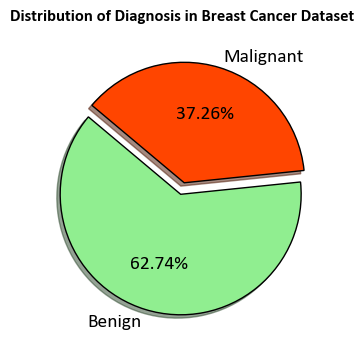

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('../mystyle.mplstyle')

diagnosis_labels = dataset.diagnosis.values
unique_labels, label_counts = np.unique(diagnosis_labels, return_counts=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(3.5, 3.5))
colors = ['LightGreen', 'OrangeRed']
explode = (0.1, 0)  # Explode the first slice

# Create the pie chart
ax.pie(label_counts, labels=unique_labels, colors=colors,
       autopct='%1.2f%%', startangle=140, explode=explode,
       shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1},
       textprops={'fontsize': 14})

ax.axis('equal')
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Distribution of Diagnosis in Breast Cancer Dataset', weight = 'bold', y=1.1)
plt.tight_layout()

[**StratifiedKFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) represents a modified iteration of the k-fold cross-validation technique. It constructs stratified folds, signifying that each fold preserves a comparable proportion of samples from each target class as found in the complete dataset. This methodology guarantees the maintenance of a consistent distribution of target classes throughout the folds, thereby augmenting the dependability of model evaluation, particularly in the context of imbalanced datasets.

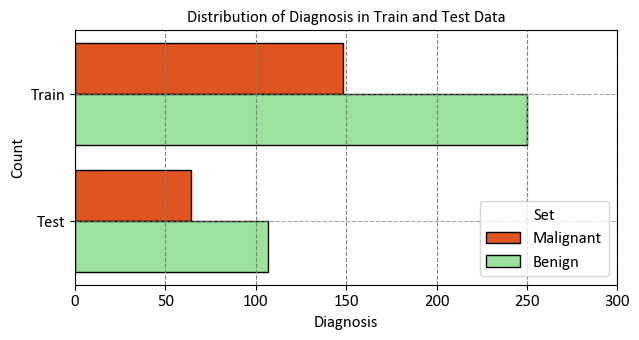

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming 'dataset' is the DataFrame containing the data
X, y = dataset.drop(columns='diagnosis'), dataset.diagnosis

# Create StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Split the data into train and test sets using iloc for proper indexing
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

train_dataset = pd.concat([X_train, y_train], axis = 1)
    
# Create DataFrames to store train and test data labels
df_temp_train = pd.DataFrame({'Diagnosis': y_train, 'Set': len(train_index) * ['Train']})
df_temp_test = pd.DataFrame({'Diagnosis': y_test, 'Set': len(test_index) * ['Test']})

# Concatenate train and test DataFrames
df_temp = pd.concat([df_temp_train, df_temp_test])

#  Set custom color palette
custom_palette = {'Benign': 'LightGreen', 'Malignant': 'OrangeRed'}

# Create figure and axes
fig, ax = plt.subplots(figsize=(6.5, 3.5))

# Create count plot with hue using custom palette
_ = sns.countplot(data=df_temp, y="Set", hue="Diagnosis",
                  palette=custom_palette, ax=ax, ec='k')

# Set title, labels, and legend
_ = ax.set(title="Distribution of Diagnosis in Train and Test Data",
           xlabel="Diagnosis", ylabel="Count", xlim = [0, 300])
_ = ax.legend(title='Set', fontsize=12, title_fontsize=12)

# Add grid lines
_ = ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve spacing
plt.tight_layout()

## Preprocess the Data

The dataset consists of ten measurements for each tumor example, encompassing mean, standard error, and largest values. The target column, labeled `"diagnosis"`, contains categorical values denoting tumor diagnoses: `'M'` for malignant tumors and `'B'` for benign tumors. To prepare this categorical data for model training, it must be converted into a numerical binary format. The [`pandas.Series.map`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) function facilitates this mapping, transforming the categorical values into numerical equivalents {cite:p}`TensorFlowDocumentation`.

`````{admonition} Note
:class: warning
The `tf.convert_to_tensor` function in TensorFlow is a utility that converts a given input, such as a Python object or a NumPy array, into a TensorFlow tensor. A tensor is a multi-dimensional array that serves as the fundamental data structure for representing and performing computations on data in TensorFlow {cite:p}`TensorFlowDocumentation`.

When you pass data to the `tf.convert_to_tensor` function, it automatically converts the data into a tensor with the appropriate data type. For example, if you provide a NumPy array containing floating-point numbers, the function will create a tensor with the corresponding data type, such as `tf.float32`. This conversion ensures that the data is compatible with TensorFlow's computational graph and various tensor operations {cite:p}`TensorFlowDocumentation`.

Here's a simple example of how `tf.convert_to_tensor` works:

```python
import tensorflow as tf

# Convert a Python list to a tensor
python_list = [1, 2, 3, 4, 5]
tensor = tf.convert_to_tensor(python_list, dtype=tf.float32)

print(tensor)
```

In this example, the Python list `python_list` is converted to a TensorFlow tensor with the specified data type `tf.float32`.

The `tf.convert_to_tensor` function is particularly useful when you need to ensure that your data is in the correct format to be processed by TensorFlow operations and models. It simplifies the process of moving data between different Python data structures and TensorFlow tensors, making it easier to work with TensorFlow's computational graph.

`````

Once the categorical column is mapped, the entire dataset can be converted into a tensor using the `tf.convert_to_tensor` function. This conversion to a tensor is a crucial step in making the data compatible with TensorFlow operations and model training. After completing these preprocessing steps, the data is ready for further use in creating and training a logistic regression model.

In [5]:
import tensorflow as tf
# To make the results reproducible, set the random seed value.
tf.random.set_seed(22)

# Convert target labels to numerical binary format
y_train, y_test = y_train.map({'Benign': 0, 'Malignant': 1}), y_test.map({'Benign': 0, 'Malignant': 1})

# Convert data to TensorFlow tensors
X_train, y_train = tf.convert_to_tensor(X_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test, y_test = tf.convert_to_tensor(X_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

In this code snippet, the target labels `'Benign'` and `'Malignant'` in the `y_train` and `y_test` data are mapped to numerical binary values (`0` and `1`, respectively) using the `map` function. Then, the data is converted to TensorFlow tensors using `tf.convert_to_tensor`, ensuring that the data is in the appropriate format for TensorFlow computations and operations. The `dtype` parameter is used to specify the desired data type of the resulting tensors, which is set to `tf.float32` in this case.

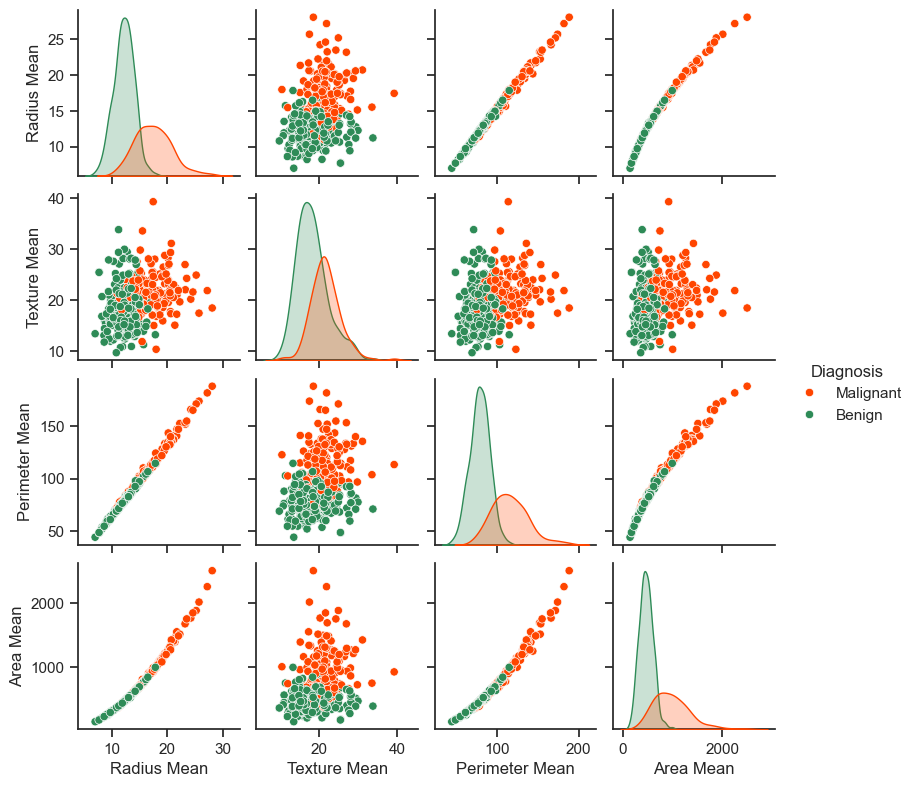

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of mean-based features for visualization
mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']

# Combine features and target labels for visualization
train_vis_data = train_dataset[mean_features].copy()
train_vis_data.columns = [x.replace('_',' ').title() for x in train_vis_data.columns]

# Create pair plot
sns.set(style="ticks")
#  Set custom color palette
custom_palette = {'Benign': 'SeaGreen', 'Malignant': 'OrangeRed'}
_ = sns.pairplot(train_vis_data, hue='Diagnosis', palette= custom_palette, height = 2)

The generated pair plot above provides insightful visualizations of the relationships between various features and the diagnosis. Notably, features like radius, perimeter, and area exhibit strong positive correlations, which is unsurprising given their inherent mathematical interdependence. Furthermore, the pair plot indicates that malignant diagnoses tend to exhibit right-skewed distributions across several features.

In addition to visualizations, it's essential to examine the overall statistics of the dataset. A noteworthy observation is that each feature covers a markedly diverse range of values, which underscores the need for normalization to ensure that the model can effectively capture relationships across these distinct scales.

In [6]:
train_dataset.describe().transpose()[:10].style\
.background_gradient(cmap='Reds', subset=['mean'])\
.background_gradient(cmap='PuBu', subset=['std'])

,count,mean,std,min,25%,50%,75%,max
radius_mean,398.000000,14.126503,3.553198,6.981000,11.672500,13.355000,15.832500,28.110000
texture_mean,398.000000,19.438241,4.322444,9.710000,16.330000,19.030000,21.862500,39.280000
perimeter_mean,398.000000,91.904422,24.447698,43.790000,75.007500,86.365000,104.175000,188.500000
area_mean,398.000000,655.325377,353.683472,143.500000,416.450000,548.750000,790.575000,2499.000000
smoothness_mean,398.000000,0.095857,0.014401,0.062510,0.085088,0.095150,0.104825,0.163400
compactness_mean,398.000000,0.102648,0.053486,0.019380,0.062660,0.090945,0.129550,0.345400
concavity_mean,398.000000,0.088497,0.081168,0.000000,0.029500,0.059640,0.132050,0.426800
concave_points_mean,398.000000,0.048535,0.039323,0.000000,0.019672,0.033300,0.070582,0.201200
symmetry_mean,398.000000,0.181364,0.027124,0.106000,0.162275,0.179800,0.195300,0.290600
fractal_dimension_mean,398.000000,0.062620,0.007131,0.050240,0.057485,0.061260,0.066092,0.097440


Given the disparate ranges among the features, it is advantageous to perform data normalization to standardize them. Normalization ensures that each feature has a mean of zero and a standard deviation of one, mitigating the influence of differing scales on the model's performance. This process, also referred to as [feature scaling](https://developers.google.com/machine-learning/glossary#feature-scaling), aids in improving the convergence speed of optimization algorithms and helps the model effectively learn relationships among the features {cite:p}`TensorFlowDocumentation`.

In [7]:
class Normalize(tf.Module):
    def __init__(self, x):
        # Initialize the mean and standard deviation for normalization
        self.mean = tf.Variable(tf.math.reduce_mean(x, axis=0))
        self.std = tf.Variable(tf.math.reduce_std(x, axis=0))

    def norm(self, x):
        # Normalize the input
        return (x - self.mean) / self.std

    def unnorm(self, x):
        # Unnormalize the input
        return (x * self.std) + self.mean

# Create a Normalize instance for the training data
norm_x = Normalize(X_train)

# Normalize the training and test data
X_train_norm, X_test_norm = norm_x.norm(X_train), norm_x.norm(X_test)

Now

In [8]:
train_dataset_norm = train_dataset.copy()
train_dataset_norm.iloc[:, :-1] = X_train_norm.numpy()
train_dataset_norm.describe().transpose()[:10].style\
.background_gradient(cmap='Reds', subset=['mean'])\
.background_gradient(cmap='PuBu', subset=['std'])

,count,mean,std,min,25%,50%,75%,max
radius_mean,398.000000,0.000000,1.001259,-2.013537,-0.691515,-0.217402,0.480735,3.940422
texture_mean,398.000000,-0.000000,1.001259,-2.253467,-0.719999,-0.094566,0.561560,4.596179
perimeter_mean,398.000000,0.000000,1.001259,-1.970532,-0.692015,-0.226867,0.502544,3.956084
area_mean,398.000000,-0.000000,1.001259,-1.448950,-0.676243,-0.301709,0.382884,5.219342
smoothness_mean,398.000000,0.000000,1.001259,-2.318505,-0.748785,-0.049181,0.623481,4.695957
compactness_mean,398.000000,0.000000,1.001259,-1.558759,-0.748563,-0.219071,0.503610,4.544295
concavity_mean,398.000000,0.000000,1.001259,-1.091673,-0.727770,-0.355973,0.537253,4.173193
concave_points_mean,398.000000,0.000000,1.001259,-1.235829,-0.734913,-0.387920,0.561394,3.887272
symmetry_mean,398.000000,0.000001,1.001259,-2.781995,-0.704641,-0.057717,0.514454,4.032390
fractal_dimension_mean,398.000000,0.000000,1.001259,-1.738242,-0.720964,-0.190913,0.487623,4.889156


## Logistic Regression

Before building a logistic regression model, it's important to grasp its fundamental concepts, especially when compared to traditional linear regression {cite:p}`TensorFlowDocumentation`.

### Understanding Logistic Regression

While linear regression generates outputs without any bounds, [logistic regression produces outputs that are confined to the $(0, 1)$ range. These outputs represent the probabilities of examples belonging to the _positive_ class {cite:p}`TensorFlowDocumentation`.

In the context of logistic regression, the outputs from linear regression, which span from $(-∞, ∞)$, are transformed into probabilities ranging from $(0, 1)$. This transformation is symmetric, so reversing the sign of the linear output gives the inverse of the original probability {cite:p}`TensorFlowDocumentation`.

Let's denote $Y$ as the probability of being in class `1` (malignant tumor). This transformation is achieved by interpreting the linear regression output as the [log odds](https://developers.google.com/machine-learning/glossary#log-odds) ratio of being in class `1` as opposed to class `0`:

\begin{equation}
\ln\left(\frac{Y}{1-Y}\right) = wX + b
\end{equation}

By defining $wX + b = z$, the equation can be solved for $Y$:

\begin{equation}
Y = \frac{e^z}{1 + e^z} = \frac{1}{1 + e^{-z}}
\end{equation}

The term $\frac{1}{1 + e^{-z}}$ is referred to as the [sigmoid function](https://developers.google.com/machine-learning/glossary#sigmoid_function) $\sigma(z)$. Consequently, the logistic regression equation simplifies to $Y = \sigma(wX + b)$.

When working with datasets featuring high-dimensional feature matrices, the equation is adapted to a matrix-vector form {cite:p}`TensorFlowDocumentation`:

\begin{equation}
\mathbf{Y} = \sigma(\mathbf{X}w + b)
\end{equation}

Here:

* $\mathbf{Y}$: target vector with dimensions $(m \times 1)$
* $\mathbf{X}$: feature matrix with dimensions $(m \times n)$
* $w$: weight vector with dimensions $(n \times 1)$
* $b$: bias
* $\sigma$: sigmoid function applied element-wise

Previously, we discussed sthe sigmoid function. To revisit the sigmoid function, we can employ `tf.math.sigmoid` to visualize it. This function effectively transforms the linear output range $(-∞, ∞)$ into the bounded range $(0, 1)$.

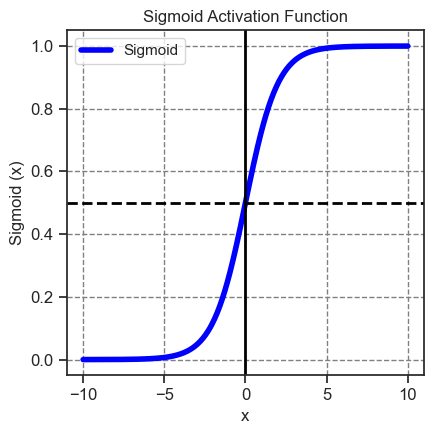

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Files/mystyle.mplstyle')

x = tf.linspace(-10, 10, 500)
x = tf.cast(x, tf.float32)

# Create the plot using subplots
fig, ax = plt.subplots(figsize=(4.5, 4.5))
_ = ax.plot(x, tf.math.sigmoid(x), label='Sigmoid', color='blue', linewidth=4)
_ = ax.axhline(0.5, color='black', linewidth=2, linestyle='--')
_ = ax.axvline(0, color='black', linewidth=2, linestyle='-')
_ = ax.set(xlabel='x', ylabel= 'Sigmoid (x)',
           title='Sigmoid Activation Function')
_ = ax.legend()
_ = ax.grid(True)
plt.tight_layout()

### The Log Loss Function

The [log loss](https://developers.google.com/machine-learning/glossary#Log_Loss), also known as binary cross-entropy loss, stands as the optimal choice for a binary classification problem involving logistic regression. For each individual example, the log loss serves to quantify the resemblance between a predicted probability and the true value of that example. This computation is determined by the following equation {cite:p}`TensorFlowDocumentation`:

\begin{equation}
L = -\frac{1}{m}\sum_{i=1}^{m} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
\end{equation}

where:

- $ \hat{y} $: a vector of predicted probabilities
- $ y $: a vector of true target values

To compute the log loss, you can make use of the `tf.nn.sigmoid_cross_entropy_with_logits` function. This function applies the sigmoid activation automatically to the regression output, simplifying the process of log loss calculation {cite:p}`TensorFlowDocumentation`.

In [10]:
def log_loss(y_pred, y):
    """
    Compute the log loss function.

    Args:
        y_pred (tensor): Predicted probabilities.
        y (tensor): True target values.

    Returns:
        tensor: Mean log loss.
    """
    # Compute the binary cross-entropy (log loss) using sigmoid cross-entropy
    ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)

    # Calculate the mean of the cross-entropy values
    return tf.reduce_mean(ce)

### The Gradient Descent Update Rule

The TensorFlow Core APIs provide convenient support for automatic differentiation through the use of `tf.GradientTape`. For those interested in understanding the mathematical underpinnings of the gradient updates in logistic regression, here's a concise explanation {cite:p}`TensorFlowDocumentation`:

Recall from the previous section that each $\hat{y}_i$ can be expressed in terms of the inputs as $\sigma(\mathbf{X_i} \mathbf{w} + b)$.

The ultimate objective is to discover optimal values $w^*$ and $b^*$ that minimize the log loss {cite:p}`TensorFlowDocumentation`:

\begin{equation}
L = -\frac{1}{m}\sum_{i=1}^{m} \left[ y_i \cdot \log(\sigma(\mathbf{X_i} \mathbf{w} + b)) + (1 - y_i) \cdot \log(1 - \sigma(\mathbf{X_i} \mathbf{w} + b)) \right]
\end{equation}

Upon calculating the gradient of $L$ with respect to $w$, the result is as follows:

\begin{equation}
\frac{\partial L}{\partial w} = \frac{1}{m} \left( \sigma(\mathbf{X} \mathbf{w} + b) - \mathbf{y} \right) \mathbf{X}
\end{equation}

Similarly, upon calculating the gradient of $L$ with respect to $b$, you obtain:

\begin{equation}
\frac{\partial L}{\partial b} = \frac{1}{m}\sum_{i=1}^{m} \sigma(\mathbf{X_i} \mathbf{w} + b) - y_i
\end{equation}

In essence, these gradient expressions represent the direction and magnitude of adjustments needed to iteratively fine-tune the weights $w$ and bias $b$ in order to minimize the log loss and consequently enhance the model's predictive accuracy {cite:p}`TensorFlowDocumentation`.

Now, let's construct the logistic regression model {cite:p}`TensorFlowDocumentation`.

In [11]:
class LogisticRegression(tf.Module):

    def __init__(self):
        self.built = False

    def __call__(self, x, train=True):
        """
        Compute the model output.

        Args:
            x (tensor): Input data.
            train (bool): Whether the model is being used for training or not.

        Returns:
            tensor: Model output.
        """
        # Initialize the model parameters on the first call
        if not self.built:
            # Randomly generate the weights and the bias term
            rand_w = tf.random.uniform(shape=[x.shape[-1], 1], seed=22)
            rand_b = tf.random.uniform(shape=[], seed=22)
            self.w = tf.Variable(rand_w)
            self.b = tf.Variable(rand_b)
            self.built = True

        # Compute the model output
        z = tf.add(tf.matmul(x, self.w), self.b)
        z = tf.squeeze(z, axis=1)

        if train:
            return z
        return tf.sigmoid(z)

For validation, ensure that the untrained model produces output values within the range of `(0, 1)` for a small subset of the training data.

In [12]:
# Create an instance of the LogisticRegression class
log_reg = LogisticRegression()

# Get model predictions for a small subset of the normalized training data
subset_size = 5
subset_x = X_train_norm[:subset_size]

# Compute model predictions
y_pred = log_reg(subset_x, train=False)

# Convert predictions to a NumPy array
predictions = y_pred.numpy()

# Display the predictions
print(predictions)

[1.         0.9378002  0.00938933 0.99999994 0.93279374]


Next, proceed by creating an accuracy function that computes the ratio of accurately classified instances during training. To extract classifications from the predicted probabilities, establish a threshold where all probabilities exceeding the threshold are assigned to class `1`. This threshold is a tunable hyperparameter, which defaults to `0.5` {cite:p}`TensorFlowDocumentation`.

In [13]:
def predict_class(y_pred, thresh=0.5):
    """
    Predict the class based on predicted probabilities.

    Args:
        y_pred (tensor): Predicted probabilities.
        thresh (float): Threshold for classification.

    Returns:
        tensor: Predicted class labels.
    """
    # Return a tensor with 1 if y_pred > threshold, and 0 otherwise
    return tf.cast(y_pred > thresh, tf.float32)

def accuracy(y_pred, y):
    """
    Calculate the accuracy of predictions.

    Args:
        y_pred (tensor): Predicted values.
        y (tensor): True labels.

    Returns:
        tensor: Accuracy value.
    """
    # Transform predicted values into probabilities using sigmoid function
    y_pred = tf.math.sigmoid(y_pred)

    # Convert predicted probabilities to class labels
    y_pred_class = predict_class(y_pred)

    # Check where predicted class matches true class and convert to float
    check_equal = tf.cast(y_pred_class == y, tf.float32)

    # Calculate accuracy as the mean of matches
    acc_val = tf.reduce_mean(check_equal)

    return acc_val

### Training the Model

Employing mini-batches for training yields advantages in terms of memory efficiency and quicker convergence. Leveraging the `tf.data.Dataset` API grants access to valuable functions designed for batching and shuffling data. This API empowers you to craft intricate input pipelines by assembling straightforward, reusable components {cite:p}`TensorFlowDocumentation`.

In [14]:
batch_size = 64

# Create a training dataset from normalized features and labels
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_norm, y_train))
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(batch_size)

# Create a testing dataset from normalized features and labels
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_norm, y_test))
test_dataset = test_dataset.shuffle(buffer_size=X_test.shape[0]).batch(batch_size)

This code prepares the training and testing datasets by converting the normalized features and labels into slices using `tf.data.Dataset.from_tensor_slices()`. Subsequently, the datasets are shuffled for randomness using the `shuffle()` function and then batched into manageable mini-batches using the `batch()` function. The defined `batch_size` determines the number of examples in each mini-batch.

Subsequently, we'll construct a training loop that sequentially adjusts the parameters of the logistic regression model. This adjustment is performed by utilizing the log loss function and calculating its gradients with respect to the input data {cite:p}`TensorFlowDocumentation`.

In [15]:
# Set training parameters
epochs = 200
learning_rate = 0.01
train_losses, test_losses = [], []
train_accs, test_accs = [], []

# Set up the training loop and begin training
for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_test, batch_accs_test = [], []

    # Iterate over the training data
    for X_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            y_pred_batch = log_reg(X_batch)
            batch_loss = log_loss(y_pred_batch, y_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)

        # Update the parameters with respect to the gradient calculations
        grads = tape.gradient(batch_loss, log_reg.variables)
        for g, v in zip(grads, log_reg.variables):
            v.assign_sub(learning_rate * g)

        # Keep track of batch-level training performance
        batch_losses_train.append(batch_loss)
        batch_accs_train.append(batch_acc)

    # Iterate over the testing data
    for X_batch, y_batch in test_dataset:
        y_pred_batch = log_reg(X_batch)
        batch_loss = log_loss(y_pred_batch, y_batch)
        batch_acc = accuracy(y_pred_batch, y_batch)

        # Keep track of batch-level testing performance
        batch_losses_test.append(batch_loss)
        batch_accs_test.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss = tf.reduce_mean(batch_losses_train)
    train_acc = tf.reduce_mean(batch_accs_train)
    test_loss = tf.reduce_mean(batch_losses_test)
    test_acc = tf.reduce_mean(batch_accs_test)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    # Print progress every 20 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Training log loss: {train_loss:.3f}")

Epoch: 0, Training log loss: 0.714
Epoch: 10, Training log loss: 0.521
Epoch: 20, Training log loss: 0.448
Epoch: 30, Training log loss: 0.361
Epoch: 40, Training log loss: 0.301
Epoch: 50, Training log loss: 0.195
Epoch: 60, Training log loss: 0.164
Epoch: 70, Training log loss: 0.151
Epoch: 80, Training log loss: 0.121
Epoch: 90, Training log loss: 0.130
Epoch: 100, Training log loss: 0.111
Epoch: 110, Training log loss: 0.138
Epoch: 120, Training log loss: 0.136
Epoch: 130, Training log loss: 0.100
Epoch: 140, Training log loss: 0.094
Epoch: 150, Training log loss: 0.131
Epoch: 160, Training log loss: 0.103
Epoch: 170, Training log loss: 0.101
Epoch: 180, Training log loss: 0.145
Epoch: 190, Training log loss: 0.098


### Evaluating Performance

Monitor the evolution of your model's loss and accuracy metrics as training progresses.

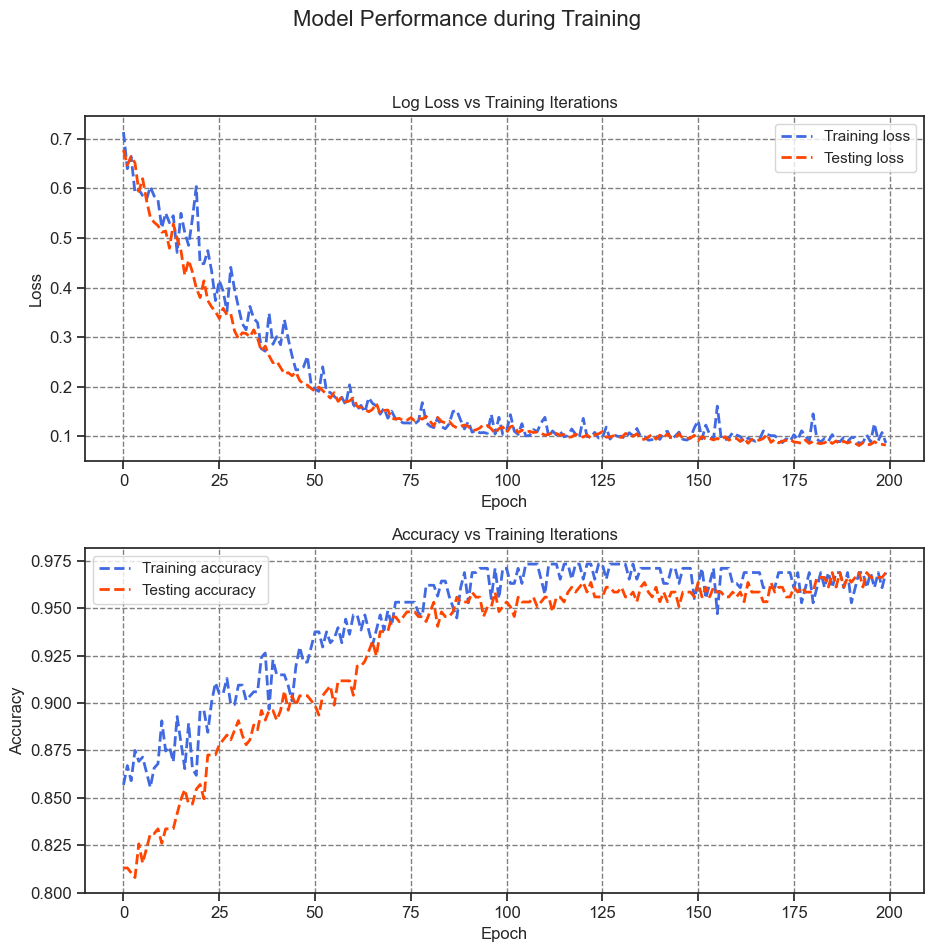

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9.5, 10))

# Define style colors
style_colors = ['RoyalBlue', 'OrangeRed']

# Plot labels and titles
plot_labels = ['Loss', 'Accuracy']
plot_titles = ['Log Loss vs Training Iterations', 'Accuracy vs Training Iterations']

# Loop through plots
for i, (label, title) in enumerate(zip(plot_labels, plot_titles)):
    # Plot training and testing metrics
    axes[i].plot(range(epochs), train_losses if label == 'Loss' else train_accs,
                 label="Training " + label.lower(), color=style_colors[0], linestyle='dashed', linewidth=2)
    axes[i].plot(range(epochs), test_losses if label == 'Loss' else test_accs,
                 label="Testing " + label.lower(), color=style_colors[1], linestyle='dashed', linewidth=2)
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel(label)
    axes[i].legend()
    axes[i].set_title(title)

# Add a common title
fig.suptitle("Model Performance during Training", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [17]:
print(f"Final training log loss: {train_losses[-1]:.3f}")
print(f"Final testing log Loss: {test_losses[-1]:.3f}")
print(f"Final training accuracy: {train_accs[-1]:.3f}")
print(f"Final testing accuracy: {test_accs[-1]:.3f}")

Final training log loss: 0.087
Final testing log Loss: 0.082
Final training accuracy: 0.969
Final testing accuracy: 0.969


- **Final Training Log Loss**: This value of 0.089 represents the logarithmic loss (log loss) of the model's predictions on the training dataset. A lower log loss signifies that the predicted probabilities align well with the true labels.

- **Final Testing Log Loss**: With a value of 0.077, this log loss pertains to the model's performance on the testing dataset. Similar to the training log loss, a lower value indicates accurate predictions on unseen data.

- **Final Training Accuracy**: This accuracy value of 0.968 signifies the proportion of correctly classified instances in the training dataset. A higher accuracy indicates better model performance.

- **Final Testing Accuracy**: The value of 0.979 represents the accuracy of the model on the testing dataset. A higher testing accuracy suggests that the model generalizes well to new, unseen data.

The model demonstrates remarkable accuracy by achieving low loss in classifying tumors within the training dataset and successfully generalizes its performance to the previously unseen test data. To delve deeper into the analysis, considering error rates can offer additional insights beyond overall accuracy. The false positive rate (FPR) and false negative rate (FNR) are two significant error rates for binary classification tasks.

For this particular problem, the FPR denotes the proportion of predictions for malignant tumors among those that are genuinely benign. Conversely, the FNR represents the proportion of predictions for benign tumors among those that are truly malignant.

To compute a confusion matrix, you can utilize [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) from the scikit-learn library. This matrix evaluates the classification's accuracy and can be visualized using Matplotlib:

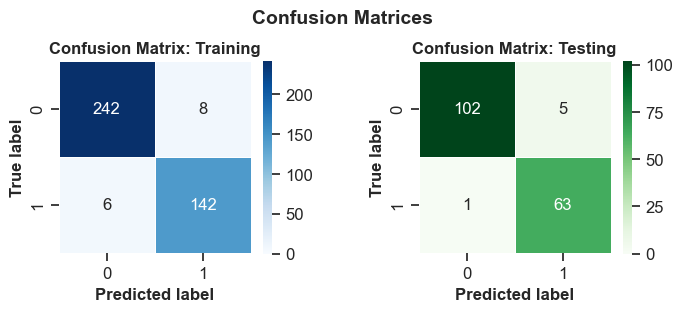

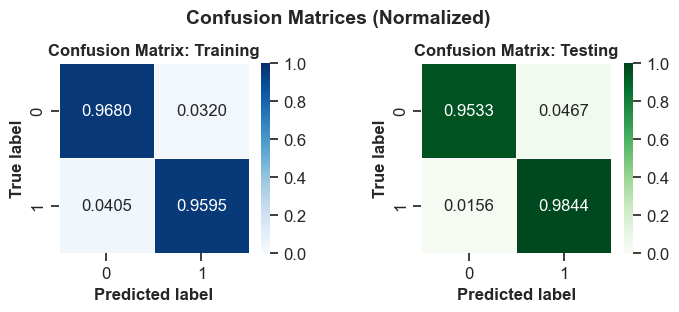

In [24]:
from sklearn import metrics

def show_confusion_matrix(y_true, y_pred, title, ax, cmap='Blues', normalized=True):
    """
    Display a confusion matrix using a heatmap.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted class labels.
        title (str): Title for the confusion matrix.
        ax (matplotlib.axes.Axes): Axes to plot on.
        cmap (str): Colormap for the heatmap.
        normalized (bool): Whether to normalize the confusion matrix.
    """
    confusion = metrics.confusion_matrix(y_true, y_pred)
    if normalized:
        confusion = confusion / confusion.sum(axis=1, keepdims=True)
    heatmap_args = dict(cmap=cmap, annot=True, fmt='.4f' if normalized else '.0f',
                        linewidths=0.4, cbar_kws={"shrink": 1},
                        annot_kws={"fontsize": 12})
    heatmap_args.update(dict(vmin=0, vmax=1) if normalized else dict(vmin=0, vmax=confusion.ravel().max()))
    axis_labels = range(2)
    sns.heatmap(confusion, xticklabels=axis_labels,
                yticklabels=axis_labels,
                square=True, ax=ax, **heatmap_args)
    _ = ax.set(xlabel="Predicted label", ylabel="True label",
               title=f"Confusion Matrix: {title}")
    for label in [ax.title, ax.xaxis.label, ax.yaxis.label]:
        label.set_fontweight('bold')
    _ = ax.grid(False)

# Get predicted classes for training and testing
y_pred_train, y_pred_test = log_reg(X_train_norm, train=False), log_reg(X_test_norm, train=False)
train_classes, test_classes = predict_class(y_pred_train), predict_class(y_pred_test)

# Create subplots for the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(7.0, 3))
show_confusion_matrix(y_train, train_classes, 'Training', ax=ax[0], cmap='Blues', normalized=False)
show_confusion_matrix(y_test, test_classes, 'Testing', ax=ax[1], cmap='Greens', normalized=False)
fig.suptitle('Confusion Matrices', fontsize=14, weight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(wspace=.5)

# Create subplots for the normalized confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(7.0, 3))
show_confusion_matrix(y_train, train_classes, 'Training', ax=ax[0], cmap='Blues', normalized=True)
show_confusion_matrix(y_test, test_classes, 'Testing', ax=ax[1], cmap='Greens', normalized=True)
fig.suptitle('Confusion Matrices (Normalized)', fontsize=14, weight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(wspace=.5)

A confusion matrix is a table that shows the performance of a classification model on a set of data for which the true values are known. It compares the actual and predicted labels of the target variable and displays the number of correct and incorrect predictions. A confusion matrix can be used to calculate various metrics that measure the accuracy, precision, recall, and specificity of a model.

The confusion matrices you provided are for a binary classification problem, where the target variable has two possible values: positive or negative. The columns represent the actual values and the rows represent the predicted values. The four cells in the matrix are:

- **True Positives (TP)**: The number of instances that are correctly predicted as positive. These are the upper-left cells in the matrices.
- **False Positives (FP)**: The number of instances that are incorrectly predicted as positive when they are actually negative. These are the upper-right cells in the matrices.
- **False Negatives (FN)**: The number of instances that are incorrectly predicted as negative when they are actually positive. These are the lower-left cells in the matrices.
- **True Negatives (TN)**: The number of instances that are correctly predicted as negative. These are the lower-right cells in the matrices.

The first confusion matrix is for the train set and the second one is for the test set. Based on these matrices, we can interpret the performance of the model as follows:

- For the training set, the model correctly predicted 242 positive instances and 142 negative instances, resulting in a total of 384 correct predictions. The model incorrectly predicted 8 negative instances as positive and 6 positive instances as negative, resulting in a total of 14 incorrect predictions. The accuracy of the model on the train set is (TP + TN) / (TP + FP + FN + TN) = 384 / 398 = 0.9648, which means that the model correctly predicted 96.48% of the instances in the train set.
- For the test set, the model correctly predicted 102 positive instances and 63 negative instances, resulting in a total of 165 correct predictions. The model incorrectly predicted 5 negative instances as positive and 1 positive instance as negative, resulting in a total of 6 incorrect predictions. The accuracy of the model on the test set is (TP + TN) / (TP + FP + FN + TN) = 165 / 171 = 0.9649, which means that the model correctly predicted 96.49% of the instances in the test set.

The model has a similar accuracy on both the train and test sets, which suggests that the model is not overfitting or underfitting the data. The model has a high precision and recall on both sets, which means that it can correctly identify most of the positive and negative instances. The model also has a high specificity on both sets, which means that it can correctly reject most of the negative instances. The model seems to perform well on the binary classification problem.